# Overfitting, Underfitting, Polynomial Regression, Lasso/Ridge/Elastic Net

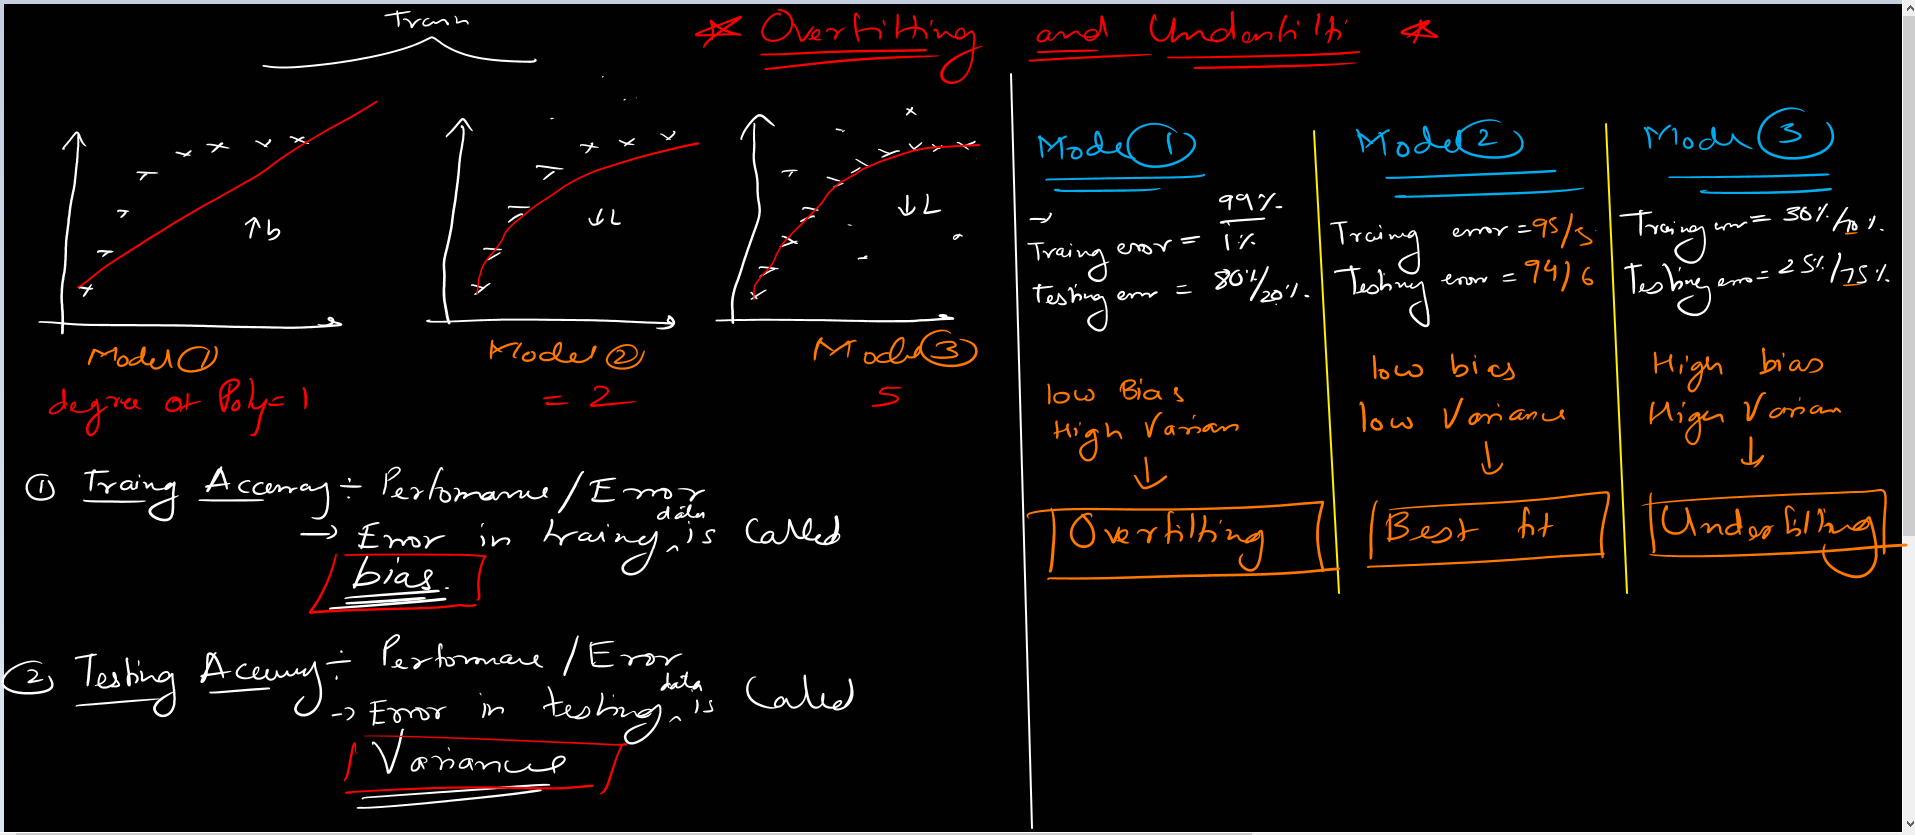

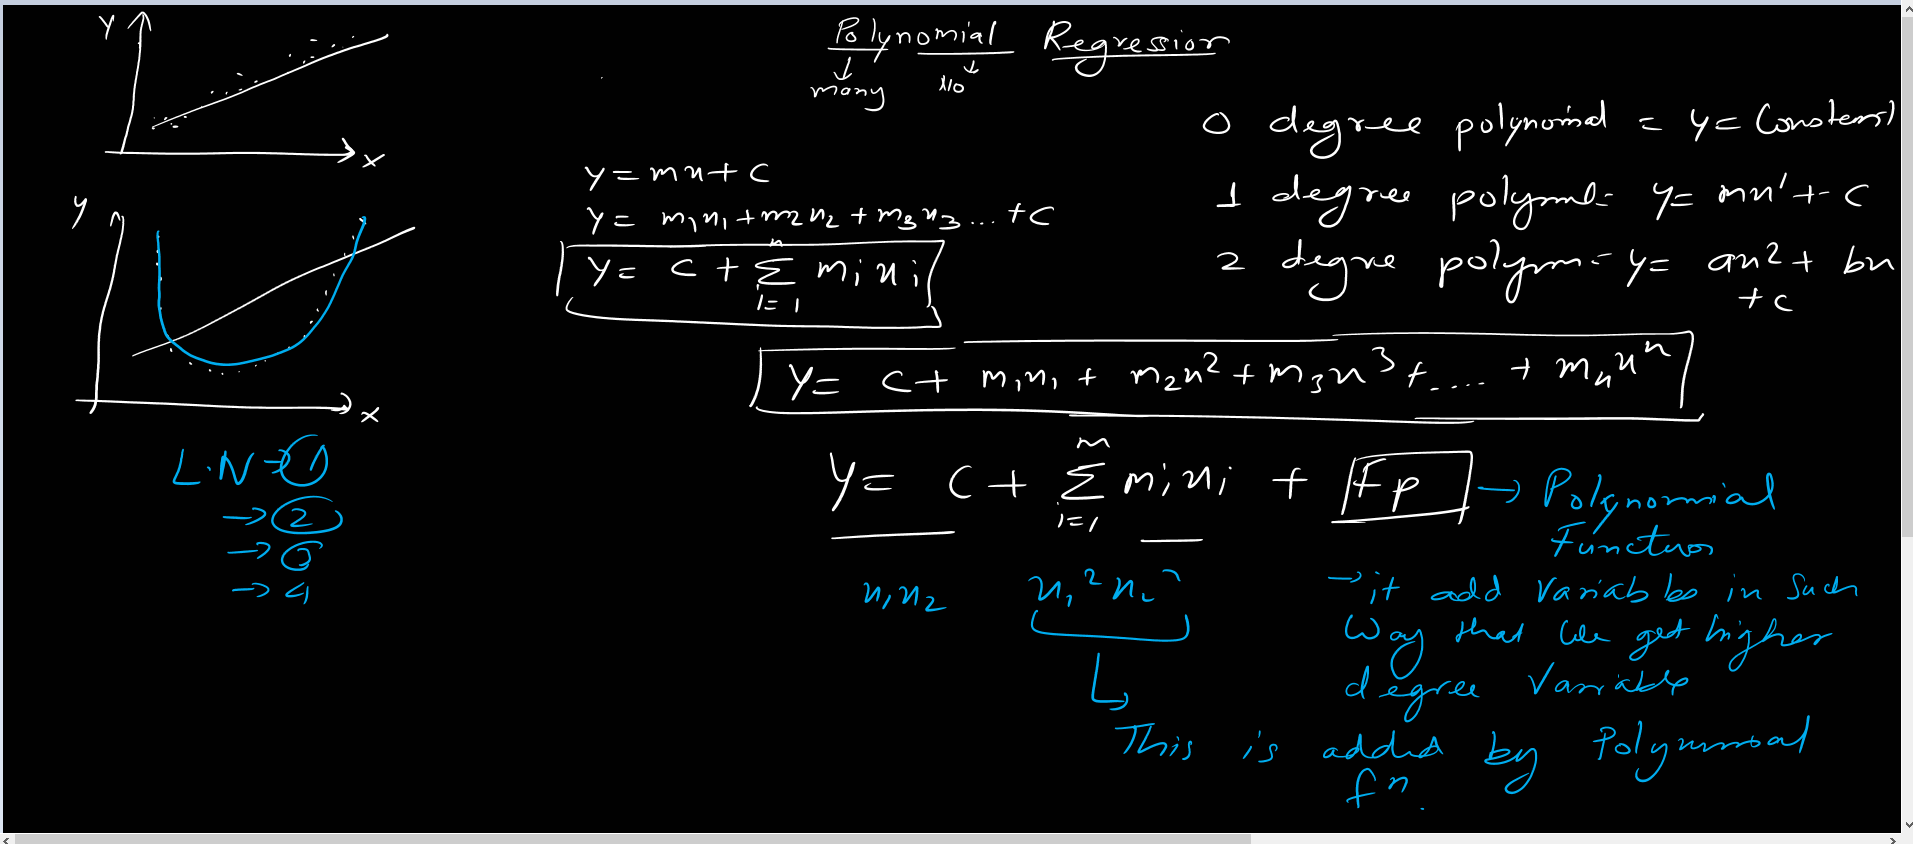

In [6]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn as sk
sns.set()

In [41]:
import warnings
warnings.filterwarnings('ignore')

# METHODS and directory of sklearn

In [11]:
data =pd.read_csv('C:\\Users\\admin\\Desktop\\Data Science\\Data for ananlysis\\Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

<AxesSubplot:xlabel='University Rating', ylabel='Density'>

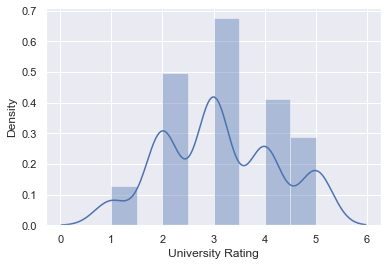

In [42]:
sns.distplot(data['University Rating'])

<AxesSubplot:xlabel='University Rating'>

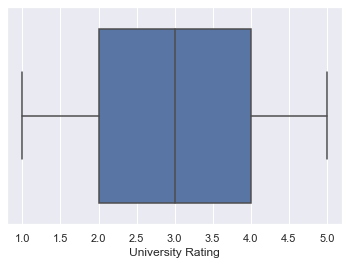

In [43]:
sns.boxplot(data['University Rating'])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

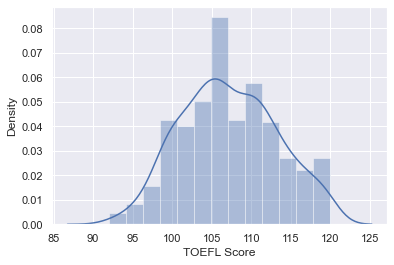

In [44]:
sns.distplot(data['TOEFL Score'])

<AxesSubplot:xlabel='TOEFL Score'>

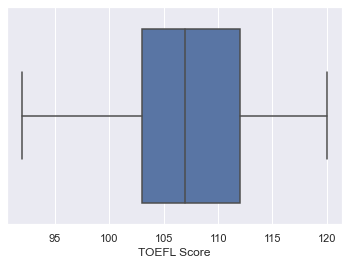

In [45]:
sns.boxplot(data['TOEFL Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

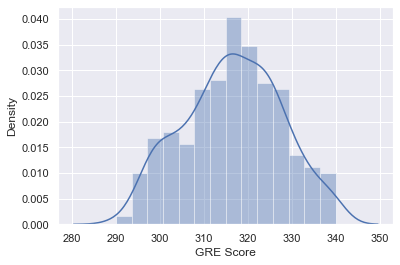

In [46]:
sns.distplot(data['GRE Score'])

<AxesSubplot:xlabel='GRE Score'>

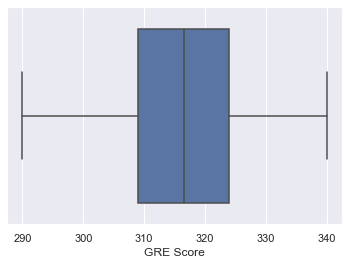

In [47]:
sns.boxplot(data['GRE Score'])

In [33]:
#University rating not normally distributed
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

#Toefel score normaly distributed + no outlier
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

#GRE score normaly distributed + no outlier
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [22]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [23]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [25]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


Let's visualize the data and analyze the relationship between independent and dependent variables:

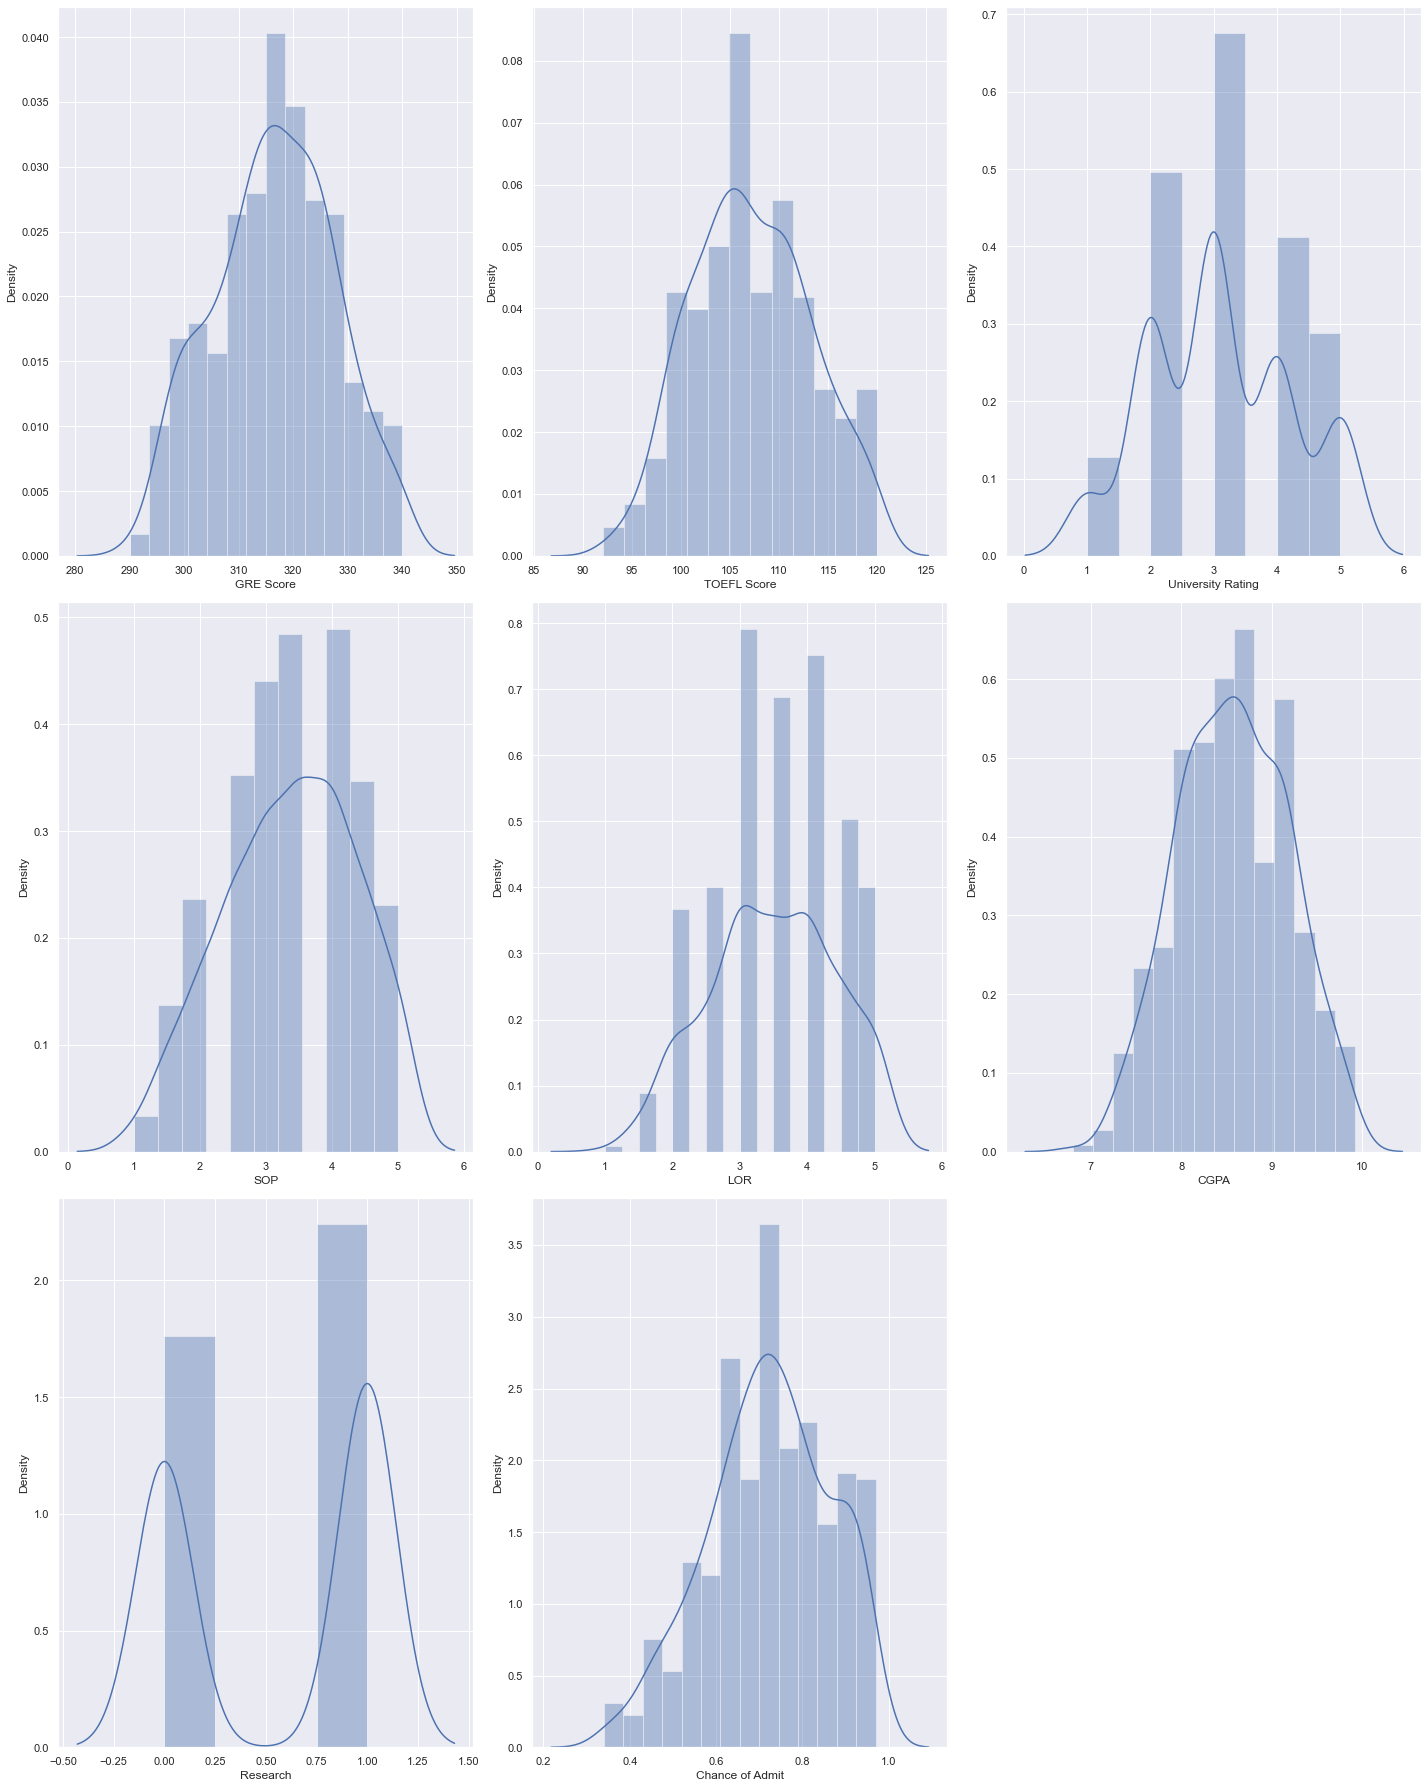

In [48]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=len(data) :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness.
@If there is skeness we need to normalize/standardize it.
Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [38]:
#Setting the features and target variables

y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

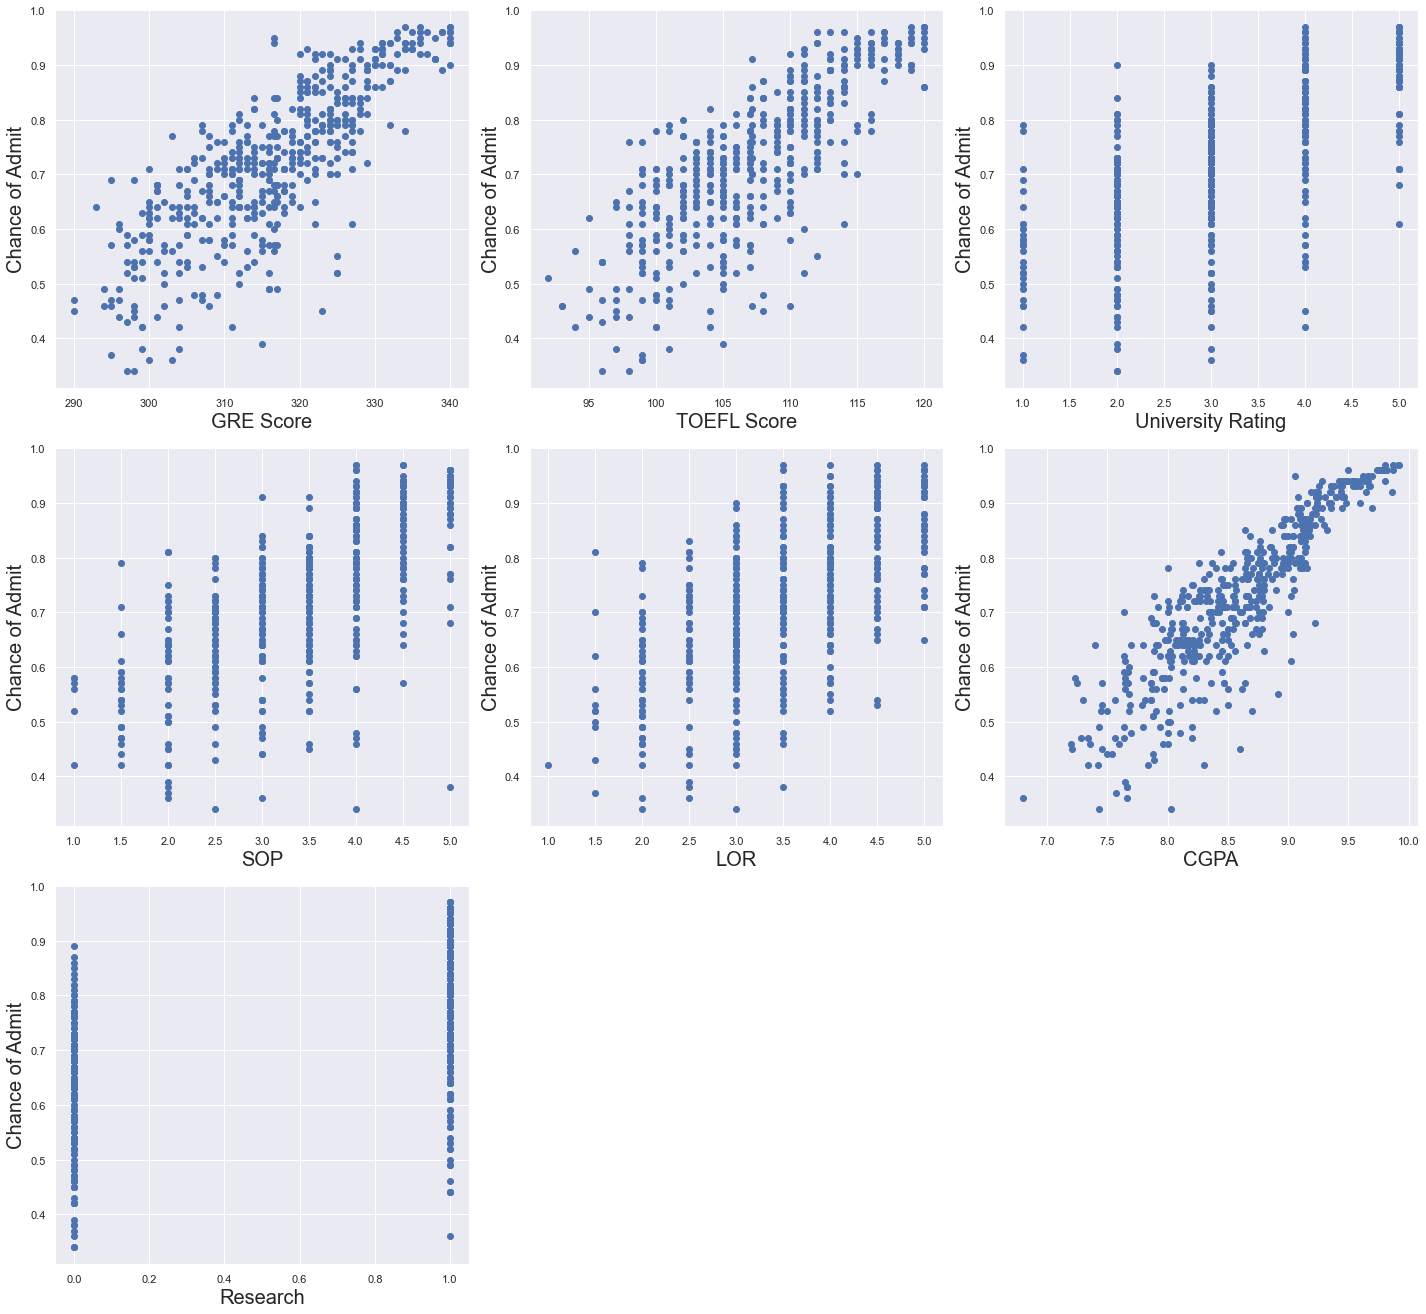

In [49]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=len(X) :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [54]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [57]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 
@If there is any feature having VIF score greater than 10, we can REMOVE it or COMBINE it with other feature.

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [59]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [60]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

## Saving the model to the local file system using pickling

In [63]:
# import pickle
# object we want to pack/store is 'regression' constructor
filename = 'LR_Admission.pickle'
fileobj=open(filename,'wb')
pickle.dump(regression,fileobj)
fileobj.close()

In [65]:
# prediction using the saved model

file=open('LR_Admission.pickle','rb')
loaded_model = pickle.load(file)
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

## Evaluating the model

In [71]:
print('R sqr on traindata: ',regression.score(x_train,y_train))
#Return the coefficient of determination :math:`R^2` of the prediction.

R sqr on traindata:  0.8415250484247909


In [9]:
#We get R2 from regression.score()

# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [72]:
print('Adjusted R sqr on train data: ',adj_r2(x_train,y_train))

Adjusted R sqr on train data:  0.8385023654247188


Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [69]:
print('R2 on testdata:', regression.score(x_test,y_test))

R2 on testdata: 0.7534898831471066


In [70]:
print('Adjusted R2 on testdata:', adj_r2(x_test,y_test))

Adjusted R2 on testdata: 0.7387414146174464


So it looks like our model r2 score is less on the test data than on train data.

Let's see if our model is overfitting our training data.

## Lasso Regularization

In [74]:
'''Lasso linear model with iterative fitting along a regularization path.
The best model is selected by cross-validation.

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||

LassoCV will return best alpha and coefficients after performing 10 cross validations
'''
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [75]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [76]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [78]:
r1=lasso_reg.score(x_test, y_test)
print('R2 with Lasso: ',r1)

R2 with Lasso:  0.7534654960492284


our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our  model did not overfit the data.

## Ridge regression model

In [81]:
'''Ridge regression with built-in cross-validation.
By default, it performs efficient Leave-One-Out Cross-Validation.
RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
We will pass an array of random numbers for ridgeCV to select best alpha from them
'''
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.26437632, 1.71813897, 0.03319434, 5.27013032, 6.87619372,
       0.77091672, 8.8741842 , 7.77922366, 0.30187804, 7.33051791,
       3.21332362, 0.21084032, 9.35256564, 7.5828395 , 9.27565111,
       5.43011813, 1.40772759, 6.33142414, 7.41118478, 1.60177006,
       8.54269981, 6.48869399, 6.56400597, 4.7448645 , 9.56492519,
       6.6396863 , 2.24883789, 6.06767948, 1.48179981, 0.26572513,
       7.78766627, 8.2906061 , 8.76832206, 2.25214426, 6.27611313,
       7.38016719, 7.49130543, 2.45615695, 2.48752892, 4.32965829,
       4.74670976, 6.63888035, 5.57534442, 6.86527213, 5.40412692,
       6.47359444, 9.94818969, 8.74081354, 4.79538347, 6.25362934]),
        cv=10, normalize=True)

In [82]:
ridgecv.alpha_

0.033194335574067146

In [83]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.033194335574067146)

In [84]:
print('R2 with Ridge: ', ridge_model.score(x_test, y_test))

R2 with Ridge:  0.7535061783488531


we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

## Elastic net

In [90]:
#Elastic Net model with iterative fitting along a regularization path.

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [86]:
elasticCV.alpha_

0.0011069728449315508

In [91]:
# l1_ratio gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [88]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [89]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our model has been well trained over the training data and there is no overfitting.

# Polynomial Regression

For understanding Polynomial Regression, let's first understand a polynomial.
Merriam-webster defines a polynomial as:
"_A mathematical expression of one or more algebraic terms each of which consists of a constant multiplied by one or more variables raised to a non-negative integral power (such as a + bx + cx^2)"._
Simply said, poly means many. So, a polynomial is an aggregation of many monomials(or Variables).
A simple polynomial equation can be written as:
$$y = {a+bx + cx^2+...+nx^n+...}$$

So, Polynomial Regression can be defined as a mechanism to predict a _dependent variable_ based on the polynomial relationship with the _independent variable_.

 In the equation, _$$y= {a+bx + cx^2+...+nx^n+...}$$_ the maximum power of 'x' is called the degree of the polynomial equation.
 For example, if the degree is 1, the equation becomes $$y={a+bx}$$ which is a simple linear equation.
              if the degree is 2, the equation becomes $$y = {a+bx + cx^2}$$ which is a quadratic equation and so on.

As we have the maths clear, now Let's focus on the Python implementation of it

In [4]:
#Necessary Imports for importing the required modules to be used
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline   
# this makes sure that the graphs are printed in the jupyter notebook itself

In [5]:
#importing the dataset
dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the
Position and Level of the employee.
But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model.
Hence, Level is our feature or X variable.
And, Salary is Label or the Y variable

In [6]:
x=dataset.iloc[:,1:2].values
#x=dataset.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=dataset.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts
1) The training dataset to train our model. And,
2) The test dataset to test our prepared model.
Here, as the dataset has a limited number of entries, we won't do a split.
Instead of that, we'd use direct numerical values to test the model.
Hence, the code above is kept commented.
But, train test split can also be done, if you desire so:)
    
To learn Polynomial Regression, we'd follow a comparative approach.
First, we'll try to create a Linear Model using Linear Regression and then we'd prepare a Polynomial Regression Model and see how do they compare to each other

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Visualising the Linear Regression results


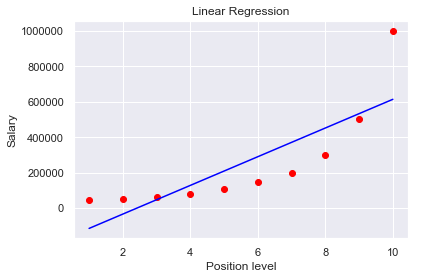

In [9]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, the red dots are the actual data points and, the blue straight line is what our model has created.
It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

In [10]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [11]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.
###### Why is it so?
It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
$$y = {a+bx + cx^2+...+nx^n+...}$$
It's not talking about the power of x, but the powers of a,b,c etc.
And as the  coefficients are only of degree 1, hence the name Linear Regression.

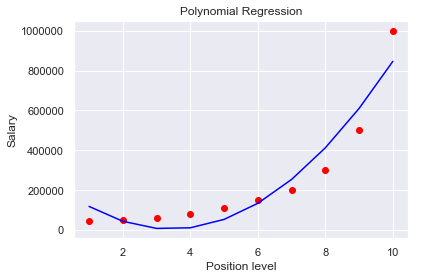

In [12]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Still, a two degree equation is also not a good fit. 
Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not.
After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [13]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

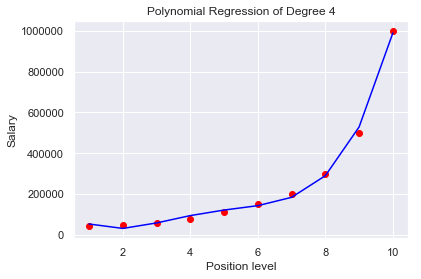

In [14]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets.
we  are getting a brilliant fit as the number of datapoints are a  few.